# fp32
Cutlass time: 0.313692 ms
Cutlass TFLOPS: 0.855729
cuBLAS time: 0.0353485 ms
cuBLAS TFLOPS: 7.59397


# bf16
Cutlass time: 0.312464 ms
Cutlass TFLOPS: 0.859094
cuBLAS time: 0.0139981 ms
cuBLAS TFLOPS: 19.1766

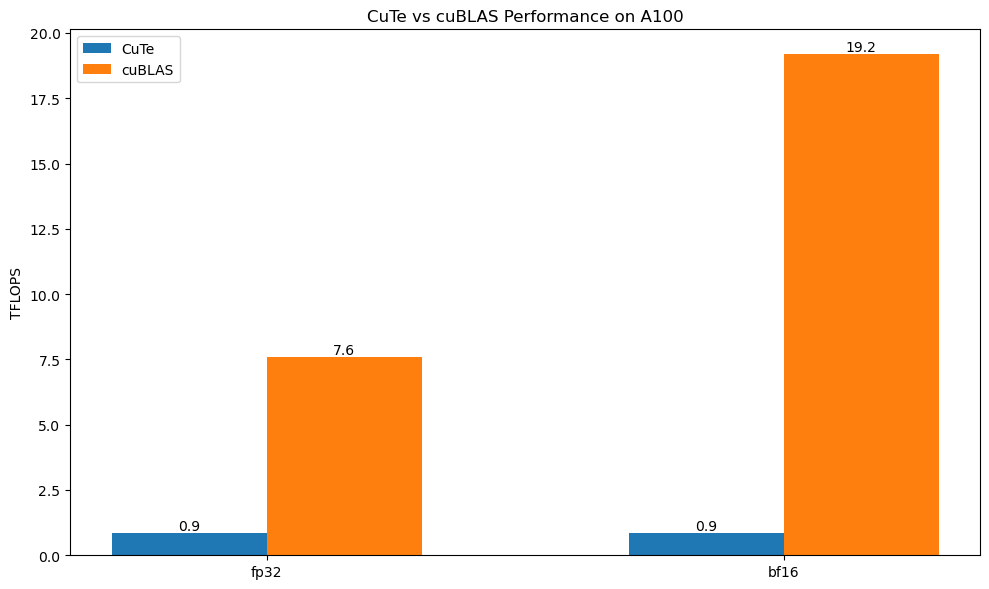

In [8]:
import matplotlib.pyplot as plt
import numpy as np

perf = {
    'fp32': {'CuTe': 0.86, 'cuBLAS': 7.59},
    'bf16': {'CuTe': 0.86, 'cuBLAS': 19.18}
}

precisions = list(perf.keys())
cute_perf = [perf[p]['CuTe'] for p in precisions] 
cublas_perf = [perf[p]['cuBLAS'] for p in precisions]

bar_width = 0.3
x = np.arange(len(precisions))

plt.figure(figsize=(10,6))
plt.bar(x - bar_width/2, cute_perf, bar_width, label='CuTe' )
plt.bar(x + bar_width/2, cublas_perf, bar_width, label='cuBLAS')

plt.ylabel('TFLOPS')
plt.title('CuTe vs cuBLAS Performance on A100')
plt.xticks(x, precisions)

for i in range(len(precisions)):
    plt.text(x[i] - bar_width/2, cute_perf[i], f'{cute_perf[i]:.1f}', 
             ha='center', va='bottom')
    plt.text(x[i] + bar_width/2, cublas_perf[i], f'{cublas_perf[i]:.1f}',
             ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()
